**ML01-LAB03**

# EDA and LOGISTIC REGRESSION

**APARNA K**

**21BDA24**

In [32]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report

In [2]:
df = pd.read_csv(r"C:\Users\acm\Desktop\Facebook_Ads_2.csv")
df

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
...,...,...,...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0


In [3]:
clicked = df[df['Clicked'] == 1]
clicked

,Names,emails,Country,Time Spent on Site,Salary,Clicked
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
5,Carla Hester,mi@Aliquamerat.edu,Liberia,52.009946,80642.65222,1
6,Griffin Rivera,vehicula@at.co.uk,Syria,42.881370,61908.39815,1
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,40.698233,34281.11878,1
...,...,...,...,...,...,...
486,Cheryl,iaculis.enim@nislelementum.edu,Indonesia,41.544304,55792.69851,1
487,Courtney,porttitor.tellus@elitelit.org,Malaysia,43.281586,54123.64650,1
490,Jonah,augue@risusNuncac.co.uk,Myanmar,34.828303,50151.32622,1
491,Merrill,dolor.sit@turpisIn.com,Egypt,37.173216,63750.41558,1


In [4]:
not_clicked = df[df['Clicked'] == 0]
not_clicked

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,25.676920,29851.41153,0
9,Rhonda Chavez,nec@nuncest.com,Somalia,29.687362,41098.87881,0
...,...,...,...,...,...,...
493,Winter,egestas.urna.justo@maurissagittis.edu,Wallis and Futuna,24.615228,34721.74862,0
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0


In [5]:
df.isna().sum()

Names                 0
emails                0
Country               0
Time Spent on Site    0
Salary                0
Clicked               0
dtype: int64

In [6]:
df.shape[0]

499

In [7]:
df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [8]:
df.drop(['Names', 'emails', 'Country'], axis=1, inplace=True)

In [9]:
df

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0
...,...,...,...
494,19.222746,44969.13495,0
495,22.665662,41686.20425,0
496,35.320239,23989.80864,0
497,26.539170,31708.57054,0


In [14]:
df.describe()

,Time Spent on Site,Salary,Clicked
count,499.000000,499.000000,499.000000
mean,32.920178,52896.992469,0.501002
std,9.103455,18989.183150,0.500501
min,5.000000,20.000000,0.000000
25%,26.425044,38888.117260,0.000000
50%,33.196067,52840.913110,1.000000
75%,39.114995,65837.288190,1.000000
max,60.000000,100000.000000,1.000000


In [16]:
df.info

<bound method DataFrame.info of      Time Spent on Site       Salary  Clicked
0             25.649648  55330.06006        0
1             32.456107  79049.07674        1
2             20.945978  41098.60826        0
3             54.039325  37143.35536        1
4             34.249729  37355.11276        0
..                  ...          ...      ...
494           19.222746  44969.13495        0
495           22.665662  41686.20425        0
496           35.320239  23989.80864        0
497           26.539170  31708.57054        0
498           32.386148  74331.35442        1

[499 rows x 3 columns]>

In [17]:
df.nunique()

Time Spent on Site    499
Salary                499
Clicked                 2
dtype: int64

In [10]:
X = df.drop('Clicked',axis=1).values
y = df['Clicked'].values

In [12]:
X = preprocessing.scale(X)

<AxesSubplot:xlabel='Time Spent on Site', ylabel='Salary'>

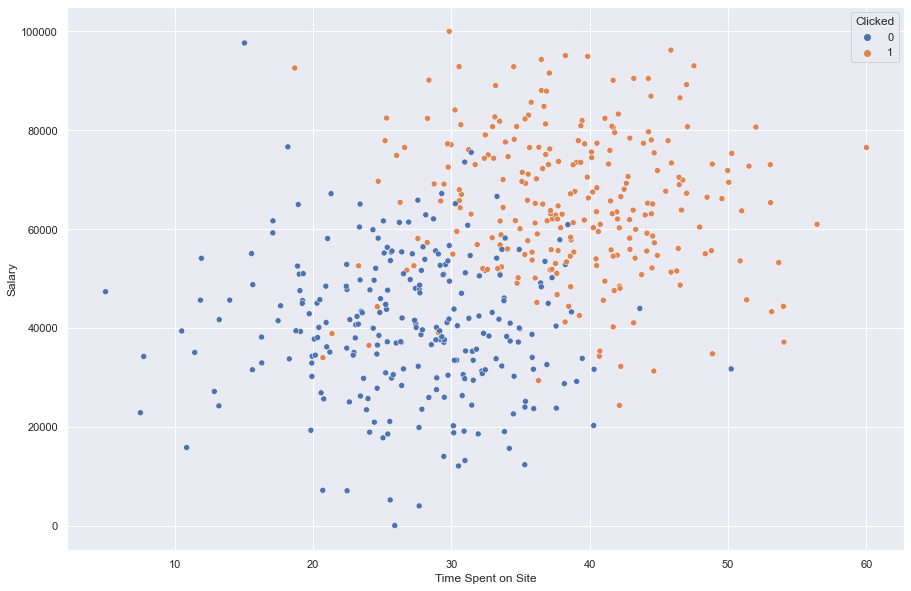

In [18]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(data=df, x=df['Time Spent on Site'], y=df['Salary'], hue = df['Clicked'])

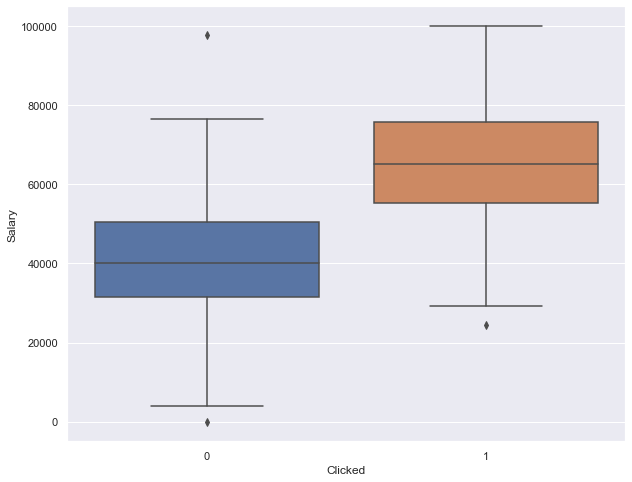

In [29]:
plt.figure(figsize = (10,8))
sns.boxplot(data=df, x = 'Clicked', y = 'Salary')
plt.show()

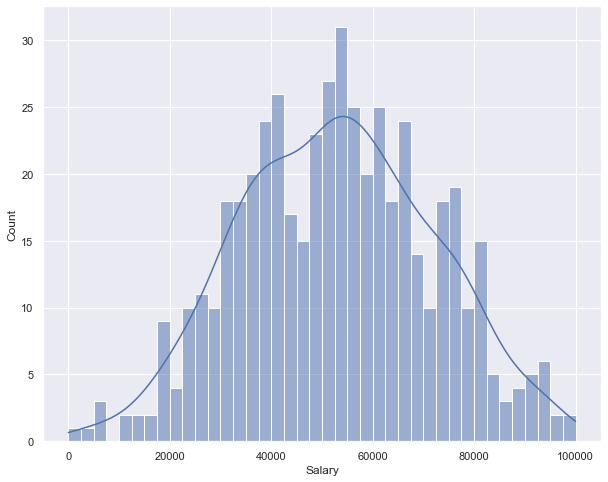

In [30]:
plt.figure(figsize = (10,8))
sns.histplot(df['Salary'], kde = True, bins = 40)
plt.show()

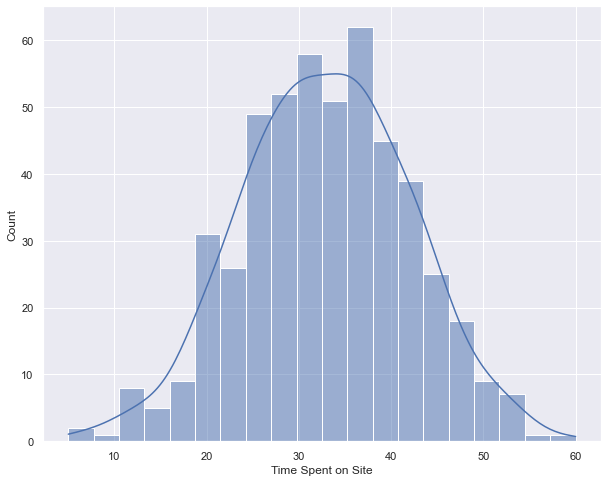

In [31]:
plt.figure(figsize = (10,8))
sns.histplot(df['Time Spent on Site'], kde = True, bins = 20)
plt.show()

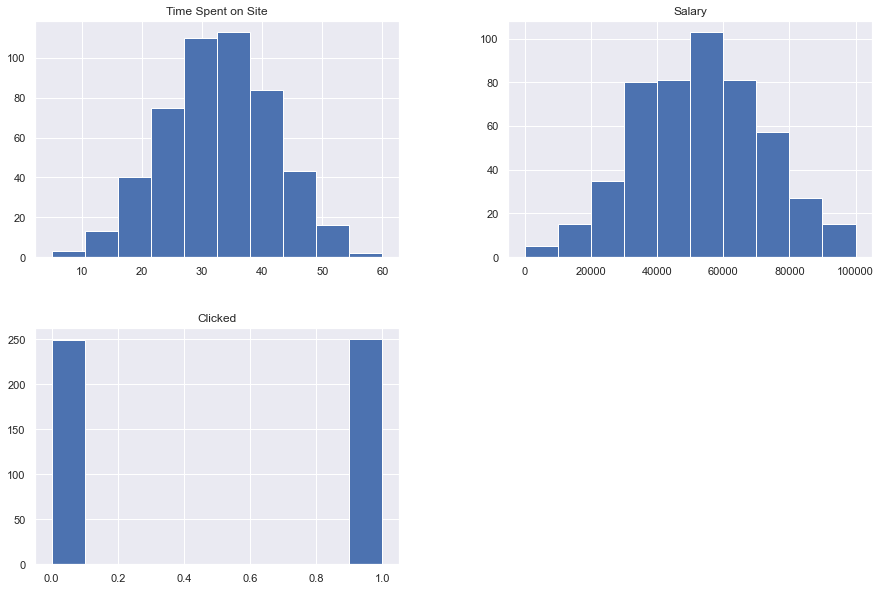

In [37]:
df.hist()
plt.show()

# Modeling and Training

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
clf = LogisticRegression(random_state=0)

In [49]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [50]:
nw = clf.predict(X_test)
nw

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [26]:
clf.score(X_train, y_train)

0.924812030075188

In [27]:
clf.score(X_test, y_test)

0.86

In [52]:
model = clf.predict(X_train)
model

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,

In [53]:
model1=clf.predict_proba(X_test)[:,1]
model1

array([6.79643846e-02, 2.09011026e-01, 6.91090342e-01, 2.12863802e-02,
       6.32213339e-01, 9.94961695e-01, 2.54430052e-01, 7.25975217e-02,
       7.85877315e-01, 1.22522378e-01, 6.27724537e-01, 6.24040386e-01,
       7.73784710e-01, 1.15660194e-01, 1.95510344e-01, 9.97417200e-01,
       1.27264270e-01, 8.99823008e-01, 8.92938362e-02, 4.99256759e-03,
       8.54690267e-02, 9.85887573e-01, 2.00096301e-02, 2.28291846e-01,
       1.03944929e-01, 2.99054204e-03, 3.91030537e-01, 9.03600027e-01,
       1.55871641e-02, 9.33454276e-01, 1.30100210e-01, 2.23006344e-01,
       6.82264810e-02, 1.64244697e-02, 3.02304985e-01, 9.94099530e-01,
       1.73104123e-01, 1.34827540e-01, 9.53400459e-01, 9.60645145e-01,
       2.71972048e-01, 5.30497307e-01, 4.72736402e-02, 4.99266484e-03,
       1.96374501e-01, 1.22439202e-01, 7.10371556e-01, 9.98747071e-01,
       8.10677882e-01, 8.95458636e-01, 1.04547053e-02, 7.65942411e-02,
       1.74938924e-01, 3.54552357e-02, 8.81517704e-01, 8.62753884e-04,
      

**Confusion Matrix**

[[43  5]
 [ 9 43]]


<AxesSubplot:>

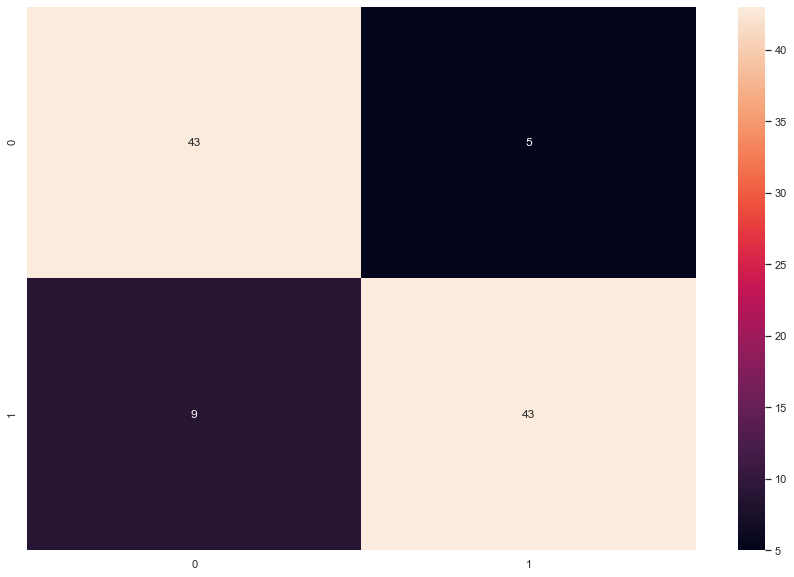

In [35]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred) * 100
sns.heatmap(cm, annot=True, fmt='d')

In [55]:
print(classification_report(y_train, model, zero_division=1, digits=3))

              precision    recall  f1-score   support

           0      0.908     0.894     0.901       188
           1      0.907     0.919     0.913       211

    accuracy                          0.907       399
   macro avg      0.907     0.907     0.907       399
weighted avg      0.907     0.907     0.907       399



In [57]:
cm = confusion_matrix(y_test,nw)
cm

array([[54,  7],
       [ 1, 38]], dtype=int64)

In [59]:
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.8852459016393442
Specificity :  0.9743589743589743
